# <font color=darkblue>ENGR 1330-2022 Exam 3-Laboratory Portion  </font>

**LAST NAME, FIRST NAME**

**R00000000**

ENGR 1330 Exam 3M - Demonstrate Laboratory/Programming Skills

---

**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [s22-ex3-deployM.ipynb](http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam3/Exam3/spring2022/s22-ex3-deploy.ipynb)

**If you are unable to download the file, create an empty notebook and copy paste the problems into Markdown cells and Code cells (problem-by-problem)**



## Exercise 1 (5 pts.)
The file [http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam3/spring2022/boxes.csv](http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam3/spring2022/boxes.csv) below contains values of impact strength of packaging materials in foot-pounds of branded boxes. 

Download the file and read it into a dataframe.

<!--```
import requests
remote_url="http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam3/spring2022/boxes.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('boxes.csv','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file
```-->

In [92]:
# download script goes here
import requests
remote_url="http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam3/spring2022/boxes.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('boxes.csv','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file

In [93]:
# read dataframe script goes here
import pandas
myboxes = pandas.read_csv('boxes.csv')  #Reading a .csv file

Describe the dataframe, how many columns are in the dataframe?  What are the column names?

In [94]:
# your script/answers go here
myboxes.describe()

,Amazon Branded Boxes,Walmart Branded Boxes,US Postal Service Branded Boxes
count,250000.000000,250000.000000,250000.000000
mean,1.210037,0.780308,1.199937
std,0.300282,0.200181,0.119895
min,-0.131195,-0.153808,0.663480
25%,1.007211,0.646009,1.118755
50%,1.211051,0.780008,1.200183
75%,1.411952,0.914654,1.280694
max,2.535326,1.655256,1.730012


Exercise 2 (15 pts.) Produce a histogram of the Amazon series and the USPS series on the same plot.  Plot Amazon using red, and Wallmart using blue.  

> - Import suitable package to build histograms
> - Apply package with plotting call to prodice two histograms on same figure space
> - Label plot and axes with suitable annotation

Comment on the histograms, do they overlap?  

<AxesSubplot:>

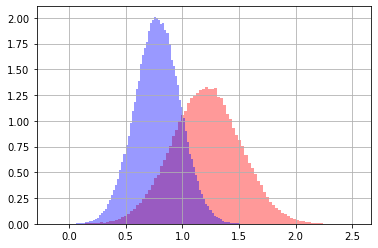

In [95]:
# your script goes here
myboxes['Amazon Branded Boxes'].hist(alpha=0.4,color='red',density="True",bins=100)
myboxes['Walmart Branded Boxes'].hist(alpha=0.4,color='blue',density="True",bins=100)

Exercise 3 (5 pts.) Determine the mean strength and the standard deviation of the Amazon and USPS brands.  Which one has a greater mean value? Which one has the greater standard deviation?

In [96]:
# your script goes here
print("Amazon mean: ",myboxes['Amazon Branded Boxes'].mean())
print("Amazon   sd: ",myboxes['Amazon Branded Boxes'].std())
print("###################################################")
print("Walmart mean: ",myboxes['Walmart Branded Boxes'].mean())
print("Walmart  sd: ",myboxes['Walmart Branded Boxes'].std())

Amazon mean:  1.210036656744606
Amazon   sd:  0.3002821784033327
###################################################
Walmart mean:  0.7803082066047033
Walmart  sd:  0.2001809928570133


Exercise 4 (5 pts.) Test the Amazon data for normality, interpret the results.

In [97]:
# your script here
import warnings
warnings.filterwarnings('ignore')
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = myboxes['Amazon Branded Boxes']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('H_o: Normal')
else:
	print('H_a: Not Normal')

stat=1.000, p=1.000
H_o: Normal


Exercise 5 (5 pts.) Test the USPS data for normality, interpret the results.

In [98]:
# your script here
import warnings
warnings.filterwarnings('default')
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = myboxes['Walmart Branded Boxes']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('H_o: Normal')
else:
	print('H_a: Not Normal')

stat=1.000, p=1.000
H_o: Normal


/opt/jupyterhub/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Exercise 6 (15 pts.)Determine if there is evidence of a difference in mean strength between the two brands.  
Use an appropriate hypothesis test to support your assertion at a level of significance of $\alpha = 0.10$. 

> - Choose a test and justify choice
> - Import suitable package to run the test
> - Apply the test and interpret the results
> - Report result with suitable annotation

In [106]:


# Example of the Paired Student's t-test
alpha = 0.10
from scipy.stats import ttest_ind
data1 = myboxes['Amazon Branded Boxes']
data2 = myboxes['Walmart Branded Boxes']
stat, p = ttest_ind(data1, data2, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('H_o: Means are equal')
else:
    print('H_a: Means are not equal')

stat=595.373, p=0.000
H_a: Means are not equal


In [107]:
from scipy.stats import kruskal
data1 = myboxes['Amazon Branded Boxes']
data2 = myboxes['Walmart Branded Boxes']
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


stat=220154.233, p=0.000
Probably different distributions
